In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [50]:
df = pd.read_csv('AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

10052

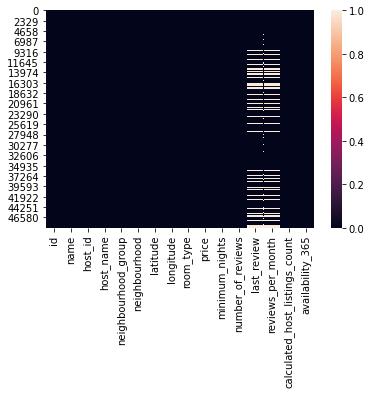

In [51]:
sns.heatmap(df.isnull())
df['last_review'].isna().sum()

In [52]:
df['reviews_per_month'].isna().sum()

10052

In [53]:
df.sample(10)

id                                               name    host_id  \
17767  13941210                  Bright Astoria Apt Near Manhattan   17452232   
9635    7399754                                       Spacious 1BR    4343834   
16298  13117282  Cheerful & Practical Garden Apartment Near Subway    2988712   
5730    4172947  Your Own 2-Bd ~ Comfortable and Unique ~ Bed-Stuy   21653460   
9512    7308927                         cool room in Bushwick loft   34873213   
26789  21263728  Urban chic private guest suite in the heart of NY   16977462   
635      239899                 Spacious & Charming by Prospect Pk    1258363   
28797  22237320  Modern Room in Coliving/15min walk to Williams...  159811367   
41545  32297005           AMAZINGLY LOCATED APARTMENT NEAR TIME SQ  242438900   
10073   7728860                          Flex 2br+sofa bed+kitchen    7503643   

      host_name neighbourhood_group              neighbourhood  latitude  \
17767      Lili              Queens           Ditmars Steinway  40.77121   
9635       Sean            Brooklyn            Carroll Gardens  40.68189   
16298     Sasha               Bronx          Claremont Village  40.83458   
5730       Zoya            Brooklyn         Bedford-Stuyvesant  40.69420   
9512     Melody            Brooklyn               Williamsburg  40.70909   
26789   Candice           Manhattan            Upper West Side  40.78642   
635        Todd            Brooklyn  Prospect-Lefferts Gardens  40.66068   
28797    Sergii            Brooklyn         Bedford-Stuyvesant  40.69676   
41545     Oscar           Manhattan             Hell's Kitchen  40.76299   
10073      Vida            Brooklyn                 Greenpoint  40.72674   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
17767  -73.91710  Entire home/apt     70               2                  9   
9635   -73.99695  Entire home/apt    150               1                  6   
16298  -73.91021  Entire home/apt     57              90                 11   
5730   -73.95269  Entire home/apt     95               7                 69   
9512   -73.92560     Private room     55               1                  1   
26789  -73.97652     Private room    125               5                 38   
635    -73.96003  Entire home/apt     80              21                  5   
28797  -73.93959      Shared room     35              30                  4   
41545  -73.98994  Entire home/apt    170               1                 39   
10073  -73.94004  Entire home/apt    159              30                  2   

      last_review  reviews_per_month  calculated_host_listings_count  \
17767  2017-10-07               0.26                               1   
9635   2016-08-02               0.12                               1   
16298  2019-05-10               0.31                               7   
5730   2018-12-07               1.79                               2   
9512   2015-07-22               0.02                               1   
26789  2019-07-01               1.80                               1   
635    2018-12-19               0.12                               1   
28797  2018-08-16               0.22                              10   
41545  2019-07-07               8.48                               1   
10073  2018-12-22               0.05                              52   

       availability_365  
17767                 0  
9635                  0  
16298                68  
5730                  0  
9512                  0  
26789                54  
635                   0  
28797               327  
41545                64  
10073                 0

In [54]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [55]:
df = df.drop(columns = ['last_review', 'reviews_per_month', 'name', 'host_name', 'room_type'])

The purpose of this notebook is just to detect outliers and remove them.
Let us check for outliers in the price column.



## Normality test for the price distribution

In [56]:
#import chart_studio.plotly as py 
from scipy.stats import normaltest
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import plot

### D'Agostino's K2Test

In [57]:
stat, p = normaltest(df['price'])

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(df['price']), stat, p, msg]
]

normt_table = ff.create_table(result_mat)
normt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
normt_table['layout']['height']=200
normt_table['layout']['margin']['t']=50
normt_table['layout']['margin']['b']=50

plot(normt_table, filename="D'Agostino-test-table")

c:\users\vishruth\appdata\local\programs\python\python37\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `D'Agostino-test-table` didn't end with .html. Adding .html to the end of your file.



"D'Agostino-test-table.html"

### Anderson-Darling Test

In [58]:
from scipy.stats import anderson

result = anderson(df['price'])
stat = round(result.statistic, 4)

p = 0
result_mat1 = []
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        msg = 'Sample looks Gaussian (fail to reject H0)'
    else:
        msg = 'Sample does not look Gaussian (reject H0)'
    result_mat1.append([len(df['price']), stat, sl, cv, msg])

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>Significance Level</b>', '<b>Critical Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat1).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff', '#EBF0F8']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.25, 0.5])
layout = dict(
    height=300,
    margin=dict(
        l=5,
        r=5,
        t=30,
        b=0
    )
)
data = [trace]
andar_table = dict(data=data, layout=layout)

plot(andar_table, filename='anderson-darling-table')

c:\users\vishruth\appdata\local\programs\python\python37\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `anderson-darling-table` didn't end with .html. Adding .html to the end of your file.



'anderson-darling-table.html'

## Using percentile as a statistic to check for outliers

In [59]:
print(df.price.min(), df.price.max())

0 10000


In [60]:
print(df.price.mean())

152.7206871868289


In [61]:
min_threshold = df.price.quantile(0.01)
max_threshold = df.price.quantile(0.99) #we can also use our intuition and use different percentiles
print(min_threshold, max_threshold)

30.0 799.0


In [77]:
fig_df = px.scatter(df, y = 'price', color = 'neighbourhood_group')
fig_df.update_yaxes(range=[0, 10000])
fig_df.show()

In [62]:
df[df['price'] < min_threshold]

id    host_id neighbourhood_group       neighbourhood  latitude  \
957      375249    1887999       Staten Island        Graniteville  40.62109   
2675    1428154    5912572            Brooklyn            Flatbush  40.63899   
2860    1620248    2196224           Manhattan        East Village  40.73051   
3020    1767037    9284163              Queens           Woodhaven  40.68968   
3918    2431607    4973668            Brooklyn  Bedford-Stuyvesant  40.68642   
...         ...        ...                 ...                 ...       ...   
48486  36280646  272872092              Queens        Forest Hills  40.73657   
48647  36354776  273393150              Queens       Richmond Hill  40.68639   
48832  36450814  267223765            Brooklyn            Flatbush  40.64922   
48867  36473044  261338177            Brooklyn           Gravesend  40.59080   
48868  36473253  261338177            Brooklyn           Gravesend  40.59118   

       longitude  price  minimum_nights  number_of_reviews  \
957    -74.16534     20               3                 80   
2675   -73.95177     29               2                  5   
2860   -73.98140     10              30                  0   
3020   -73.85219     29               2                386   
3918   -73.93440     25               5                 76   
...          ...    ...             ...                ...   
48486  -73.85088     16               9                  1   
48647  -73.81847     28               2                  0   
48832  -73.96078     20               1                  0   
48867  -73.97116     25               1                  0   
48868  -73.97119     25               7                  0   

       calculated_host_listings_count  availability_365  
957                                 1               226  
2675                                1               321  
2860                                4               137  
3020                                3                50  
3918                                3               258  
...                               ...               ...  
48486                               1               322  
48647                               1                24  
48832                               3               363  
48867                               6               338  
48868                               6               365  

[404 rows x 11 columns]

In [63]:
df[df['price'] > max_threshold]

id    host_id neighbourhood_group       neighbourhood  latitude  \
85        19601      74303            Brooklyn    Brooklyn Heights  40.69723   
496      174966     836168           Manhattan     Upper West Side  40.77350   
662      250801    1314834           Manhattan   Greenwich Village  40.73129   
762      273190     605463           Manhattan        West Village  40.73301   
780      279857    1420300            Brooklyn  Bedford-Stuyvesant  40.68492   
...         ...        ...                 ...                 ...       ...   
48304  36189195  270214015           Manhattan      Hell's Kitchen  40.75533   
48305  36189257  272166348           Manhattan     Upper East Side  40.78132   
48523  36308562  217732163            Brooklyn  Bedford-Stuyvesant  40.68767   
48535  36311055  245712163            Brooklyn  Bedford-Stuyvesant  40.68245   
48839  36452721  274079964            Brooklyn      Sheepshead Bay  40.59866   

       longitude  price  minimum_nights  number_of_reviews  \
85     -73.99268    800               1                 25   
496    -73.98697   2000              30                 30   
662    -73.99944    850               3                107   
762    -74.00268   1300               5                 28   
780    -73.95489    800               4                122   
...          ...    ...             ...                ...   
48304  -73.99866   2999              30                  0   
48305  -73.95262   1999              30                  0   
48523  -73.95805   1369               1                  0   
48535  -73.93417   1749               1                  0   
48839  -73.95661    800               1                  0   

       calculated_host_listings_count  availability_365  
85                                  1                 7  
496                                11                 0  
662                                 1               249  
762                                 4               297  
780                                 1               257  
...                               ...               ...  
48304                               1               222  
48305                               1               270  
48523                               1               349  
48535                               1               303  
48839                               1                23  

[474 rows x 11 columns]

In [64]:
df1 = df[(df['price'] > min_threshold) & (df['price'] < max_threshold)]

In [65]:
fig_df1 = px.scatter(df1, y = 'price', color = 'neighbourhood_group')
fig_df1.update_yaxes(range=[0, 10000])
fig_df1.show()

## Using box plots to check and visualize outliers

In [67]:
import statistics
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
count    48895.000000       48895.000000                    48895.000000   
mean         7.029962          23.274466                        7.143982   
std         20.510550          44.550582                       32.952519   
min          1.000000           0.000000                        1.000000   
25%          1.000000           1.000000                        1.000000   
50%          3.000000           5.000000                        1.000000   
75%          5.000000          24.000000                        2.000000   
max       1250.000000         629.000000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

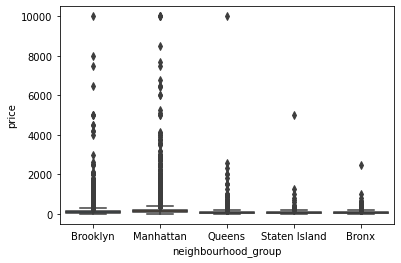

In [68]:
df2 = df.copy()
sns.boxplot(x=df2['neighbourhood_group'], y=df2['price'])


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

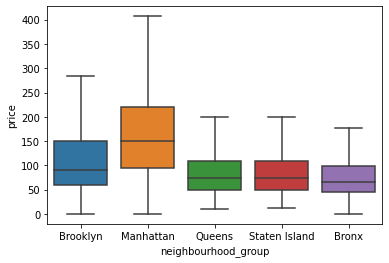

In [69]:
sns.boxplot(x=df2['neighbourhood_group'], y=df2['price'], showfliers = False)

We can see from the above image that we have a lot of outliers.

## Using scatterplots to check and visualize outliers

In [70]:
fig_sp = px.scatter(df2, y = 'price', color = 'neighbourhood_group')
fig_sp.show()

The above outliers maybe due to the variance in data. However, it is essential to remove it from our dataset so that it does not affect our model. 

## Using IQR to detect outliers

In [71]:
import numpy as np
df_IQR = df.copy()
df_IQR = df_IQR.sort_values('price')
df_IQR.head()

id    host_id neighbourhood_group       neighbourhood  latitude  \
25796  20639914   86327101            Brooklyn  Bedford-Stuyvesant  40.68258   
25634  20523843   15787004            Brooklyn            Bushwick  40.69467   
25433  20333471  131697576               Bronx     East Morrisania  40.83296   
25753  20608117    1641537            Brooklyn          Greenpoint  40.72462   
23161  18750597    8993084            Brooklyn  Bedford-Stuyvesant  40.69023   

       longitude  price  minimum_nights  number_of_reviews  \
25796  -73.91284      0               1                 95   
25634  -73.92433      0               2                 16   
25433  -73.88668      0               2                 55   
25753  -73.94072      0               2                 12   
23161  -73.95428      0               4                  1   

       calculated_host_listings_count  availability_365  
25796                               6               222  
25634                               5                 0  
25433                               4               127  
25753                               2                 0  
23161                               4                28

In [72]:
Q3 = df_IQR.price.quantile(0.75)
Q1 = df_IQR.price.quantile(0.25)
IQR = Q3 - Q1
print(Q3, Q1, IQR)

175.0 69.0 106.0


In [73]:
upper_limit = Q3 + (IQR*1.5)
lower_limit = Q1 - (IQR*1.5)
print(upper_limit, lower_limit)

334.0 -90.0


###### As we can see above the IQR method for finding outliers in this dataset is not accurate as it returns a negative lower fence value for outlier detection, and price can not be negative. Our dataset has multiple listings with price 0, and this according to common knowledge is not the case in a city like New York.

## Using Z-score to detect outliers

In [74]:
df_zscore = df.copy()
outliers = []
def detect_outliers(data):
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in df_zscore['price']:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

df_zscore.head()
price = df_zscore.loc[:, 'price']

In [75]:
outliers_pt = detect_outliers(price)
df_zscore = df_zscore[~df_zscore['price'].isin(outliers_pt)]
df_zscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48507 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48507 non-null  int64  
 1   host_id                         48507 non-null  int64  
 2   neighbourhood_group             48507 non-null  object 
 3   neighbourhood                   48507 non-null  object 
 4   latitude                        48507 non-null  float64
 5   longitude                       48507 non-null  float64
 6   price                           48507 non-null  int64  
 7   minimum_nights                  48507 non-null  int64  
 8   number_of_reviews               48507 non-null  int64  
 9   calculated_host_listings_count  48507 non-null  int64  
 10  availability_365                48507 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 4.4+ MB


In [76]:
fig_zscore =  px.scatter(df_zscore, y = 'price', color = 'neighbourhood_group')
fig_zscore.update_yaxes(range=[0, 10000])
fig_zscore.show()